In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv('adult.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

In [7]:
df.describe()

NameError: name 'df' is not defined

In [4]:
df.dropna(inplace=True, axis=0)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47592 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47592 non-null  int64 
 1   workclass       47592 non-null  object
 2   fnlwgt          47592 non-null  int64 
 3   education       47592 non-null  object
 4   education-num   47592 non-null  int64 
 5   marital-status  47592 non-null  object
 6   occupation      47592 non-null  object
 7   relationship    47592 non-null  object
 8   race            47592 non-null  object
 9   sex             47592 non-null  object
 10  capital-gain    47592 non-null  int64 
 11  capital-loss    47592 non-null  int64 
 12  hours-per-week  47592 non-null  int64 
 13  native-country  47592 non-null  object
 14  income          47592 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [4]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'object']

In [5]:
x = df[numerical_columns]
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48837,39,215419,13,0,0,36
48838,64,321403,9,0,0,40
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [6]:
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})

y = df['income'].value_counts()
print(y)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [9]:
x = df[numerical_columns]
x.head()
y = df["income"]
v_counts = pd.value_counts(y)
print(v_counts)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


C:\Users\DRT\AppData\Local\Temp\ipykernel_33064\3164506479.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  v_counts = pd.value_counts(y)


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [11]:
# Preprocessing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
lr = LogisticRegression(multi_class='ovr') 
lr.fit(x_train_scaled, y_train)
y_hat_lr = lr.predict(x_test_scaled)

C:\Users\DRT\.conda\envs\DST_7\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:
acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr)
print(report)

Model accuracy was 81.14%
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88     11109
        >50K       0.70      0.39      0.50      3544

    accuracy                           0.81     14653
   macro avg       0.76      0.67      0.69     14653
weighted avg       0.80      0.81      0.79     14653



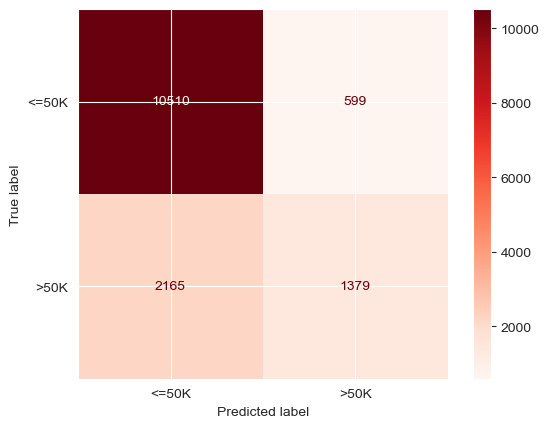

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_lr, cmap=plt.cm.Reds)
plt.savefig('Lr.png', bbox_inches='tight', dpi=300)

plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
y_hat_dt = dt.predict(x_test_scaled)
acc = accuracy_score(y_test, y_hat_dt)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_dt)
print(report)

Model accuracy was 79.89%
              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88     11109
        >50K       0.99      0.17      0.29      3544

    accuracy                           0.80     14653
   macro avg       0.89      0.58      0.59     14653
weighted avg       0.84      0.80      0.74     14653



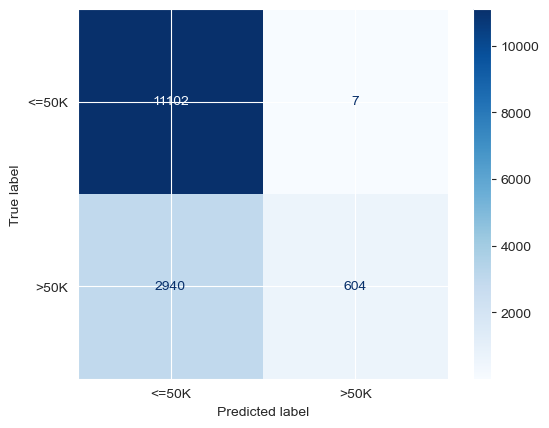

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_dt, cmap=plt.cm.Blues)
plt.savefig('DT.png', bbox_inches='tight', dpi=300)

plt.show()